
# Flight Delay Prediction - Exploratory Data Analysis (EDA)

This notebook contains the exploratory data analysis (EDA) of the flight delay dataset. The analysis includes data cleaning, feature engineering, and visualization to extract insights about flight delays.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("data/Train.csv")

# Display the first few rows of the dataset to understand its structure
data.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [3]:
# Calculate the mean delay time
mean_delay = data.target.mean()
print("Mean delay time:", mean_delay)

Mean delay time: 48.73301308504818


In [4]:
# Calculate the number of unique flight IDs
unique_flights = data.FLTID.nunique()
print("Number of unique flights:", unique_flights)

Number of unique flights: 1861


In [5]:
# Check for missing values in the dataset
missing_values = data.isna().sum()
print("Missing values in the dataset:\n", missing_values)

Missing values in the dataset:
 ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
target    0
dtype: int64


In [6]:
# Get info about the dataset, including data types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [7]:
# Get the shape of the dataset
data_shape = data.shape
print("Shape of the dataset:", data_shape)

Shape of the dataset: (107833, 10)


In [8]:
# Convert DATOP to datetime format
data["DATOP"] = pd.to_datetime(data["DATOP"], format="%Y-%m-%d")

# Extract year and month from DATOP and add them into new columns
data["Year"] = data["DATOP"].dt.year
data["Month_number"] = data["DATOP"].dt.month
data["Month"] = data["DATOP"].dt.strftime("%b")

# Display the new add
data.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,Year,Month_number,Month
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,2016,1,Jan
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,2016,1,Jan
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,2016,1,Jan
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,2016,1,Jan
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,2016,1,Jan


In [9]:
# Calculate the number of unique years in the dataset
unique_years = data.Year.nunique()
print("Number of unique years:", unique_years)

Number of unique years: 3


### Exploring the dataset through plots to gain insights

Insights and comments of the plots are provided just before the corresponding plot.

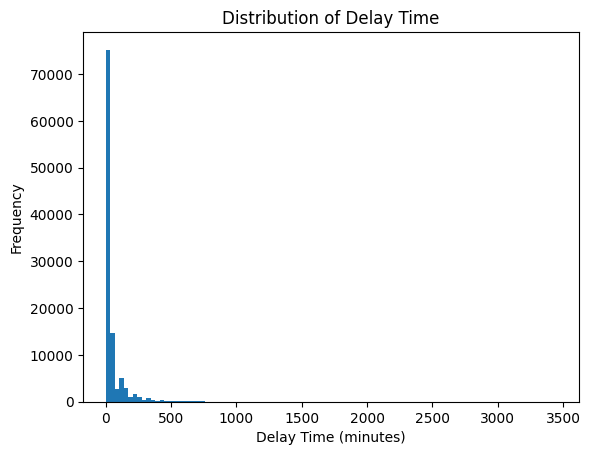

In [10]:
### Distribution of delay time
bin = 100
plt.hist(data["target"], bins=bin)
plt.title("Distribution of Delay Time")
plt.xlabel("Delay Time (minutes)")
plt.ylabel("Frequency")
plt.show()

# Insight: The histogram shows the frequency distribution of delay times. Most delays are clustered 
# around the lower values, with a long tail towards higher delays.


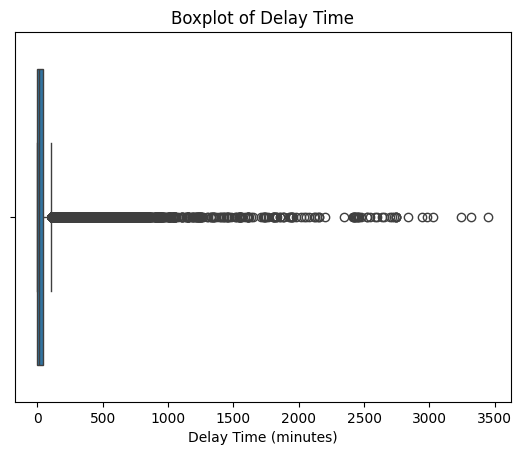

In [11]:
sns.boxplot(data=data, x="target")
plt.title("Boxplot of Delay Time")
plt.xlabel("Delay Time (minutes)")
plt.show()

# Insight: The boxplot highlights the presence of outliers in the delay times, as indicated by the 
# points beyond the whiskers.


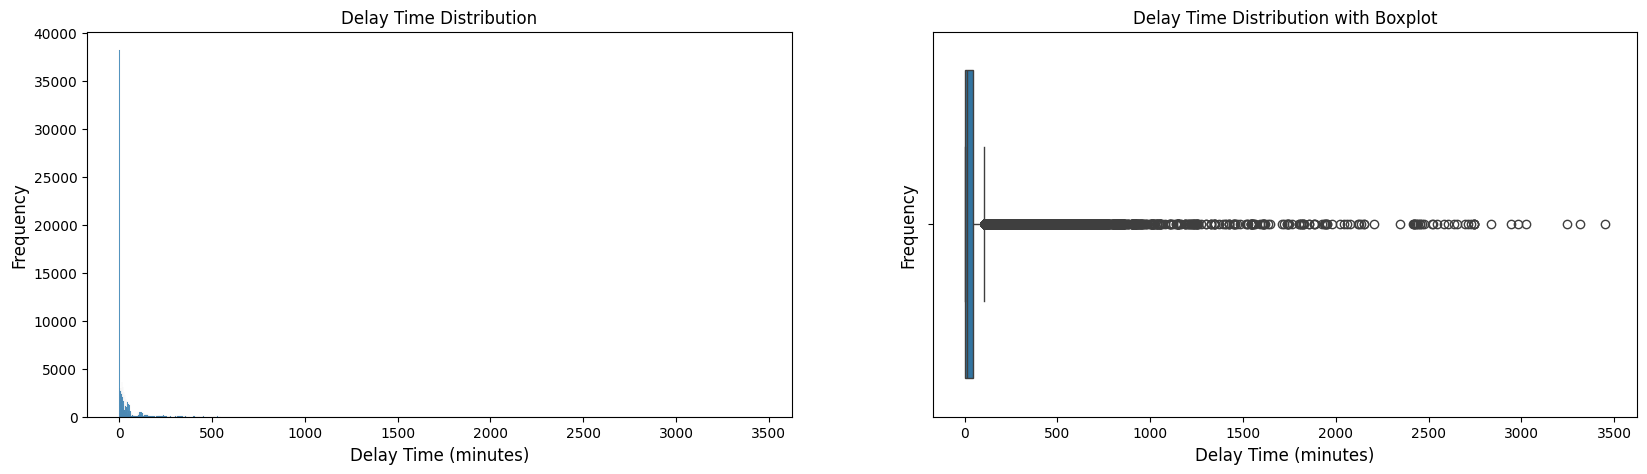

In [12]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
f1 = 12
g1 = sns.histplot(data=data, x="target")
g1.set_title("Delay Time Distribution", fontsize=f1)
g1.set_xlabel("Delay Time (minutes)", fontsize=f1)
g1.set_ylabel("Frequency", fontsize=f1)

plt.subplot(1, 2, 2)
g2 = sns.boxplot(data=data, x="target")
g2.set_title("Delay Time Distribution with Boxplot", fontsize=f1)
g2.set_xlabel("Delay Time (minutes)", fontsize=f1)
g2.set_ylabel("Frequency", fontsize=f1)
plt.show()

# Insight: The combined histogram and boxplot provide a comprehensive view of the delay time distribution, 
# showing the central tendency, spread, and outliers.

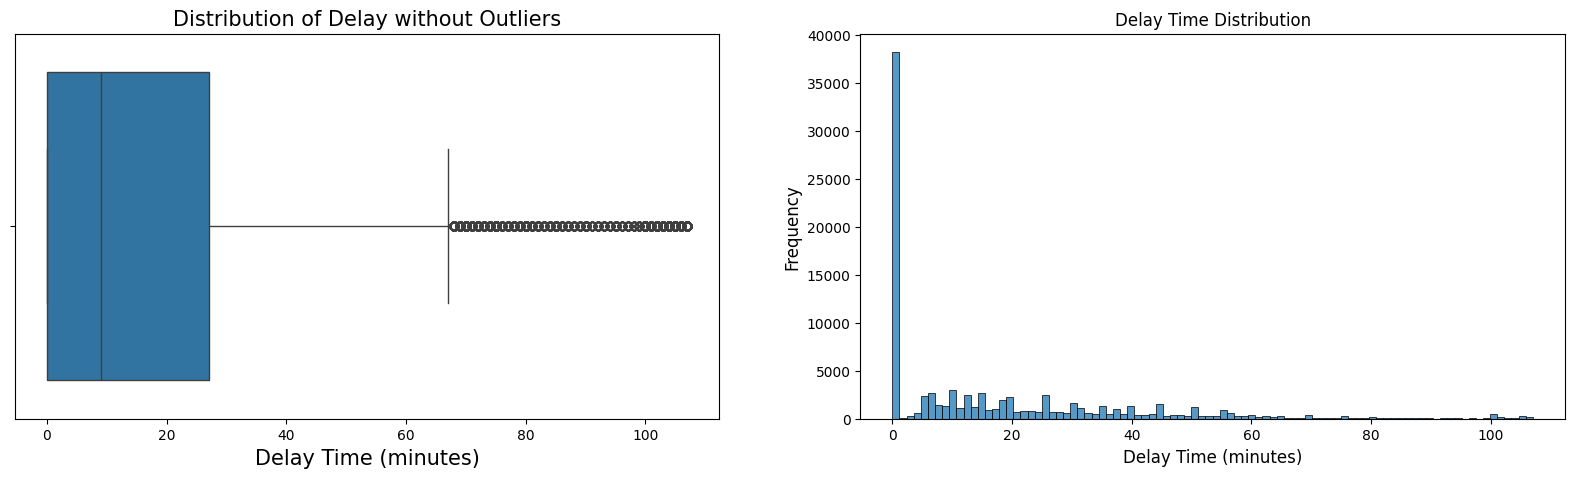

In [13]:
# Section to remove outliers
plt.figure(figsize=(20, 5))

# Copy the data for outlier removal
df_1 = data.copy()

# Setting the quantile range
Q1 = df_1['target'].quantile(0.25)
Q3 = df_1['target'].quantile(0.75)
IQR = Q3 - Q1

# Removing the outliers
df_no_outliers = df_1[(df_1['target'] > (Q1 - 1.5 * IQR)) & (df_1['target'] < (Q3 + 1.5 * IQR))]

plt.subplot(1, 2, 1)
g2 = sns.boxplot(x=df_no_outliers["target"])
g2.set_xlabel("Delay Time (minutes)", fontsize=15)
g2.set_title('Distribution of Delay without Outliers', fontsize=15)

plt.subplot(1, 2, 2)
f1 = 12
g1 = sns.histplot(data=df_no_outliers, x="target")
g1.set_title("Delay Time Distribution", fontsize=f1)
g1.set_xlabel("Delay Time (minutes)", fontsize=f1)
g1.set_ylabel("Frequency", fontsize=f1)
plt.show()

# Insight: Removing outliers provides a clearer picture of the central distribution of delay times, 
# focusing on the majority of the data.


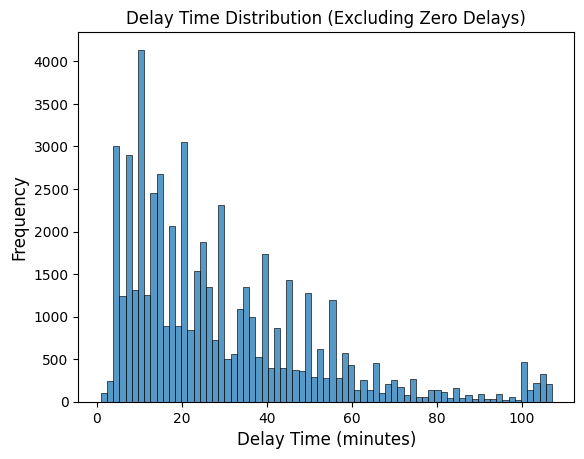

In [14]:
# Distribution of delay time excluding zero delays
delay_0 = df_no_outliers[df_no_outliers["target"] != 0]
g1 = sns.histplot(data=delay_0, x="target")
g1.set_title("Delay Time Distribution (Excluding Zero Delays)", fontsize=f1)
g1.set_xlabel("Delay Time (minutes)", fontsize=f1)
g1.set_ylabel("Frequency", fontsize=f1)
plt.show()

# Insight: Excluding zero delays focuses the analysis on actual delays, providing insights into 
# the distribution of delay times when delays occur.


/var/folders/w5/nv1036h1131ctgg_p1s_zzy80000gn/T/ipykernel_2380/708149538.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p1 = sns.lineplot(data=data, x='Month', y='target', hue='Year', palette=colors, ci=None)
/var/folders/w5/nv1036h1131ctgg_p1s_zzy80000gn/T/ipykernel_2380/708149538.py:5: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  p1 = sns.lineplot(data=data, x='Month', y='target', hue='Year', palette=colors, ci=None)


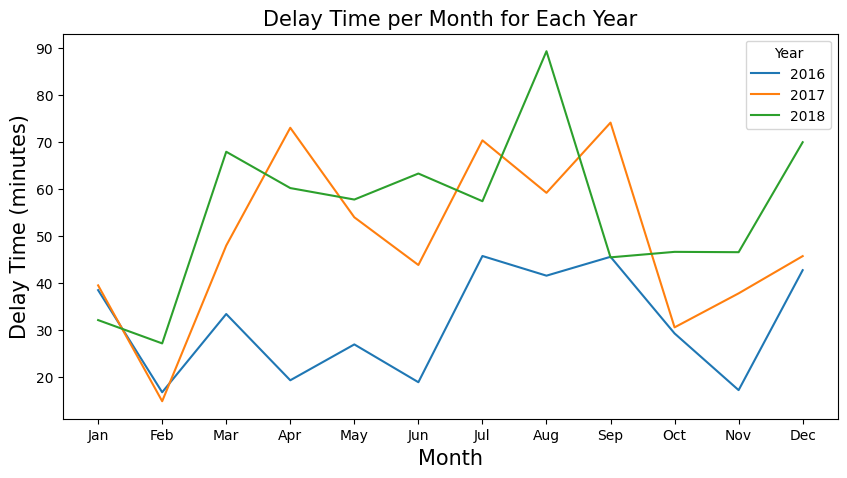

In [15]:
## Year and month with most delays
plt.figure(figsize=(10, 5))
average_monthly_delay = data.groupby(['Month', 'Year'])['target'].mean().reset_index()
colors = sns.color_palette("tab10", n_colors=6)
p1 = sns.lineplot(data=data, x='Month', y='target', hue='Year', palette=colors, ci=None)
p1.set_xlabel("Month", fontsize=15)
p1.set_ylabel("Delay Time (minutes)", fontsize=15)
p1.set_title('Delay Time per Month for Each Year', fontsize=15)
plt.show()

# Insight: The line plot shows the trend of delay times across different months for each year, 
# helping identify patterns or anomalies in specific years or months.

/var/folders/w5/nv1036h1131ctgg_p1s_zzy80000gn/T/ipykernel_2380/1675587675.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p1 = sns.barplot(data=data, x='Month', y='target', hue="Year", palette=colors, ci=None)
/var/folders/w5/nv1036h1131ctgg_p1s_zzy80000gn/T/ipykernel_2380/1675587675.py:3: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  p1 = sns.barplot(data=data, x='Month', y='target', hue="Year", palette=colors, ci=None)


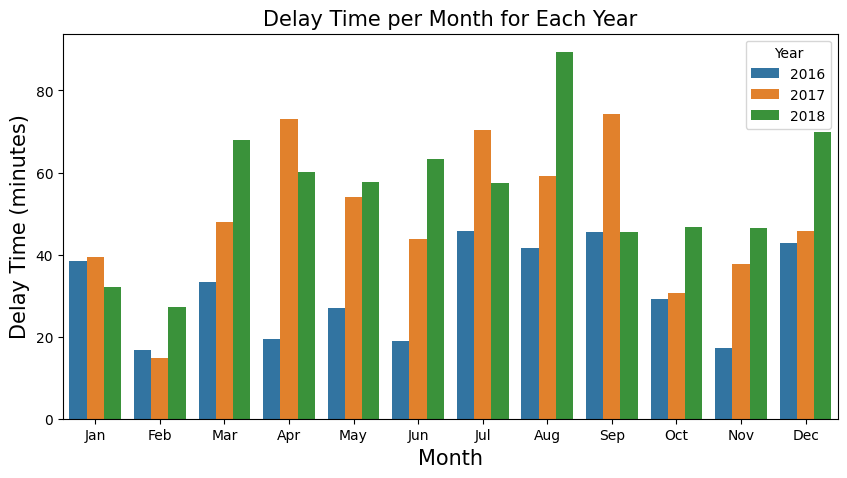

In [16]:
plt.figure(figsize=(10, 5))
colors = sns.color_palette("tab10", n_colors=6)
p1 = sns.barplot(data=data, x='Month', y='target', hue="Year", palette=colors, ci=None)
p1.set_xlabel("Month", fontsize=15)
p1.set_ylabel("Delay Time (minutes)", fontsize=15)
p1.set_title('Delay Time per Month for Each Year', fontsize=15)
plt.show()

# Insight: The bar plot provides a visual comparison of delay times across different months 
# for each year, highlighting variations and trends.

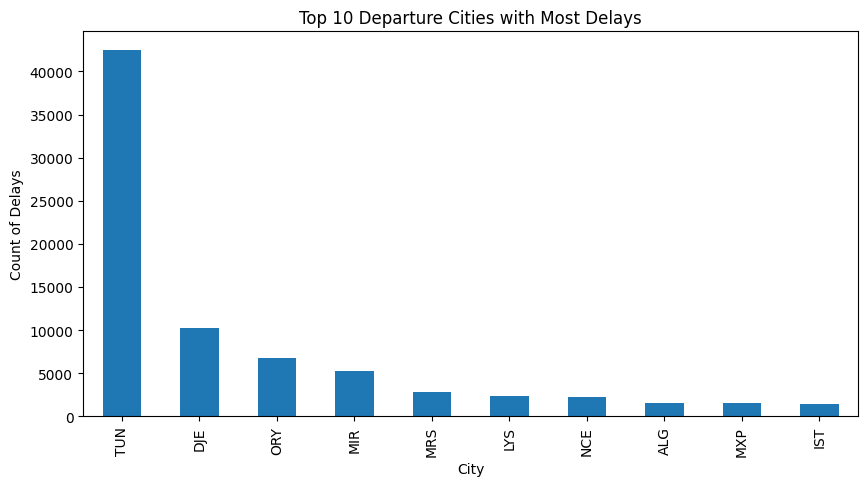

In [17]:

## Departure city and destination with most delays
plt.figure(figsize=(10, 5))
data.DEPSTN.value_counts().nlargest(10).plot(kind="bar")
plt.title("Top 10 Departure Cities with Most Delays")
plt.xlabel("City")
plt.ylabel("Count of Delays")
plt.show()

# Insight: This bar plot shows the top 10 departure cities with the most delays, indicating 
# potential bottlenecks or issues at these locations.

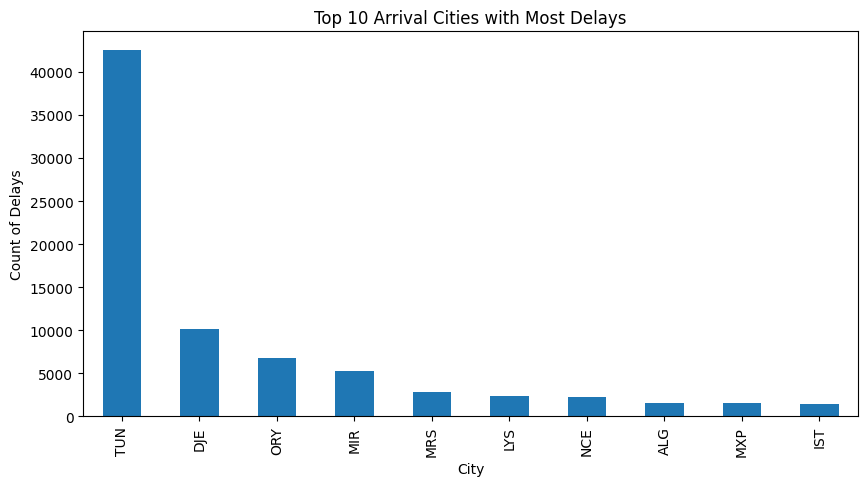

In [18]:
plt.figure(figsize=(10, 5))
data.ARRSTN.value_counts().nlargest(10).plot(kind="bar")
plt.title("Top 10 Arrival Cities with Most Delays")
plt.xlabel("City")
plt.ylabel("Count of Delays")
plt.show()

# Insight: This bar plot shows the top 10 arrival cities with the most delays, highlighting 
# destinations with frequent delays.

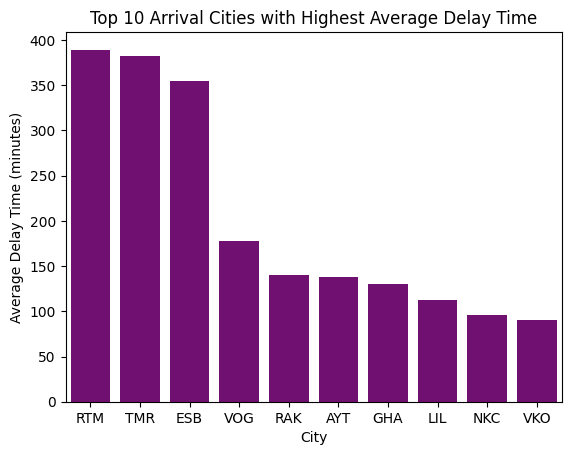

In [19]:
# Average delay time by arrival city
mean_target_by_arrstn = data.groupby("ARRSTN")["target"].mean()
mean_target_by_arrstn_sorted = mean_target_by_arrstn.sort_values(ascending=False).reset_index().head(10)
sns.barplot(data=mean_target_by_arrstn_sorted, x="ARRSTN", y="target", color="purple")
plt.title("Top 10 Arrival Cities with Highest Average Delay Time")
plt.xlabel("City")
plt.ylabel("Average Delay Time (minutes)")
plt.show()

# Insight: The bar plot shows the top 10 arrival cities with the highest average delay times, 
# indicating destinations that may require attention to reduce delays.

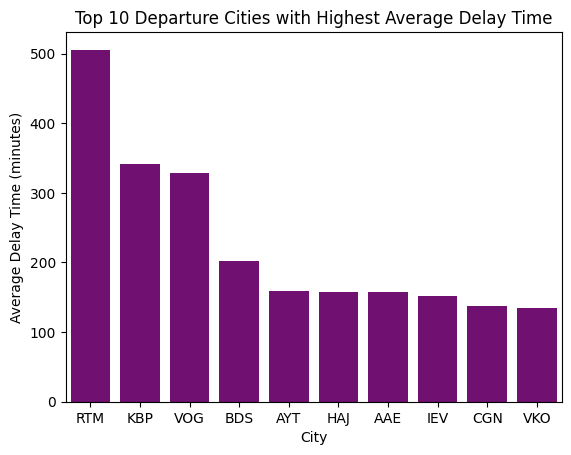

In [20]:
# Average delay time by departure city
mean_target_by_dep = data.groupby("DEPSTN")["target"].mean()
mean_target_by_dep_sorted = mean_target_by_dep.sort_values(ascending=False).reset_index().head(10)
sns.barplot(data=mean_target_by_dep_sorted, x="DEPSTN", y="target", color="purple")
plt.title("Top 10 Departure Cities with Highest Average Delay Time")
plt.xlabel("City")
plt.ylabel("Average Delay Time (minutes)")
plt.show()

# Insight: The bar plot shows the top 10 departure cities with the highest average delay times, 
# indicating origins that may contribute significantly to delays.

In [21]:
# Create combined departure-arrival column
pref_data = data.sort_values(by="target", ascending=False).head(20)
df_1 = pref_data[["DEPSTN", "ARRSTN", "target"]]
df_1["dep_arival"] = df_1["DEPSTN"] + " - " + df_1["ARRSTN"]
df_1

# Calculate mean and max delay times
mean_delay_time = data.target.mean()
max_delay_time = data.target.max()
print("Mean delay time:", mean_delay_time)
print("Max delay time:", max_delay_time)

Mean delay time: 48.73301308504818
Max delay time: 3451.0


/var/folders/w5/nv1036h1131ctgg_p1s_zzy80000gn/T/ipykernel_2380/2318808523.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["dep_arival"] = df_1["DEPSTN"] + " - " + df_1["ARRSTN"]


In [22]:
# Classify delays into categories
for dataset in data:
    data.loc[data['target'] == 0, 'delay_type'] = "no_delay"
    data.loc[(data['target'] >= 5) & (data['target'] <= 48), 'delay_type'] = "slightly_delay"
    data.loc[(data['target'] > 48), 'delay_type'] = "critical_delay"

for dataset in data:
    data.loc[data['target'] == 0, 'Delay'] = "no_delay"
    data.loc[(data['target'] != 0), 'Delay'] = "delay"

data["dep_arival"] = data["DEPSTN"] + " - " + data["ARRSTN"]

# Display the updated data with the new 'dep_arival' column
data.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,Year,Month_number,Month,delay_type,Delay,dep_arival
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,2016,1,Jan,critical_delay,delay,CMN - TUN
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,2016,1,Jan,slightly_delay,delay,MXP - TUN
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,2016,1,Jan,no_delay,no_delay,TUN - IST
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,2016,1,Jan,no_delay,no_delay,DJE - NTE
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,2016,1,Jan,slightly_delay,delay,TUN - ALG


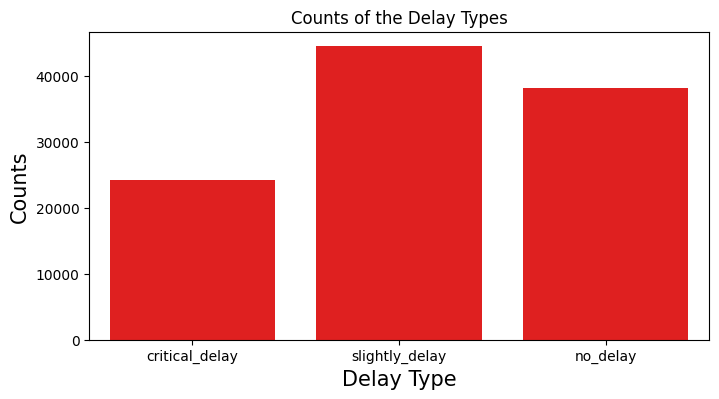

In [23]:
# Plotting the counts of different delay types
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x="delay_type", color="red")
plt.title("Counts of the Delay Types")
plt.xlabel("Delay Type", fontsize=15)
plt.ylabel("Counts", fontsize=15)
plt.show()

# Insight: The count plot shows the number of occurrences for each delay type (no delay, 
# slightly delay, critical delay), highlighting the prevalence of different delay severities.

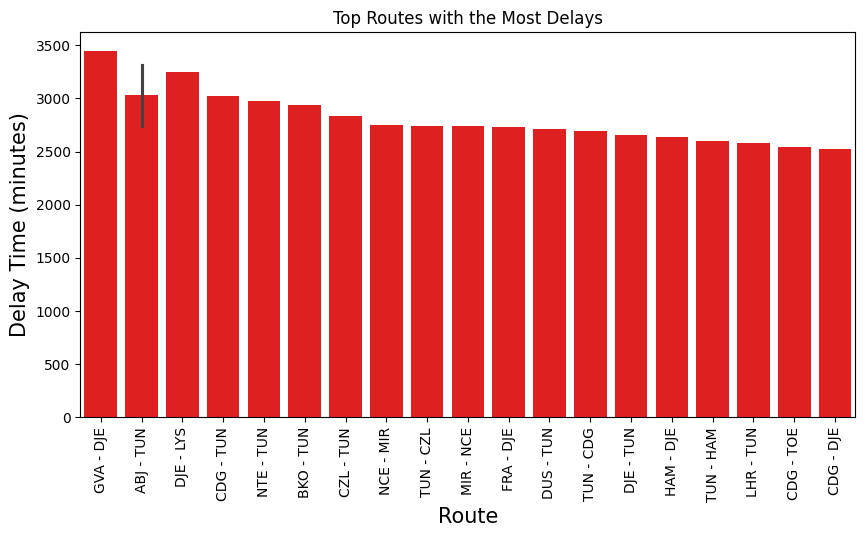

In [24]:
# Descriptive statistics of the 'target' column
data.target.describe()

# Plotting delay time by departure-arrival routes with the most delays
plt.figure(figsize=(10, 5))
sns.barplot(data=df_1, x="dep_arival", y="target", color="red")
plt.xticks(rotation=90)
plt.title("Top Routes with the Most Delays")
plt.xlabel("Route", fontsize=15)
plt.ylabel("Delay Time (minutes)", fontsize=15)
plt.show()

# Insight: The bar plot shows the routes with the highest delay times, helping identify specific 
# routes that contribute significantly to overall delays.

/var/folders/w5/nv1036h1131ctgg_p1s_zzy80000gn/T/ipykernel_2380/846234214.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  p1 = sns.lineplot(data=data, x='Month', y='target', palette=colors)


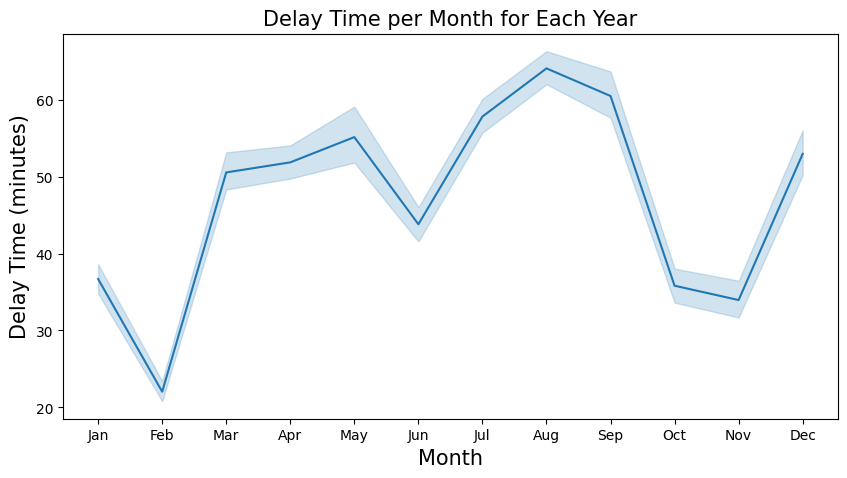

In [25]:

# Delay time per month for each year
plt.figure(figsize=(10, 5))
colors = sns.color_palette("tab10", n_colors=6)
p1 = sns.lineplot(data=data, x='Month', y='target', palette=colors)
p1.set_xlabel("Month", fontsize=15)
p1.set_ylabel("Delay Time (minutes)", fontsize=15)
p1.set_title('Delay Time per Month for Each Year', fontsize=15)
plt.show()

# Insight: The line plot illustrates the variation in delay times across different months, 
# potentially indicating seasonal trends in delays.

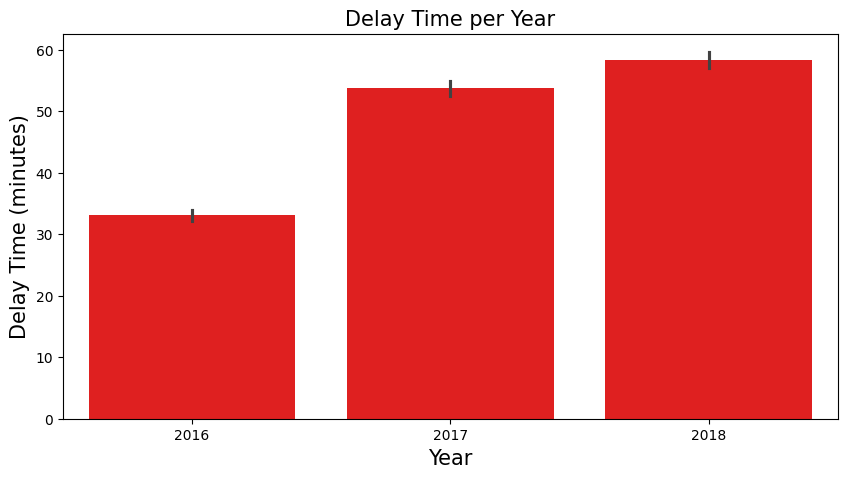

In [26]:
# Delay time per year
plt.figure(figsize=(10, 5))
colors = sns.color_palette("tab10", n_colors=6)
p1 = sns.barplot(data=data, x='Year', y='target', color="red")
p1.set_xlabel("Year", fontsize=15)
p1.set_ylabel("Delay Time (minutes)", fontsize=15)
p1.set_title('Delay Time per Year', fontsize=15)
plt.show()

# Insight: The bar plot shows the average delay time for each year, helping identify any 
# significant changes in delay trends over the years.

/var/folders/w5/nv1036h1131ctgg_p1s_zzy80000gn/T/ipykernel_2380/3285140629.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  p1 = sns.lineplot(data=data, x='Month', y='target', palette=colors)
/var/folders/w5/nv1036h1131ctgg_p1s_zzy80000gn/T/ipykernel_2380/3285140629.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  p1 = sns.lineplot(data=data, x='Year', y='target', palette=colors)


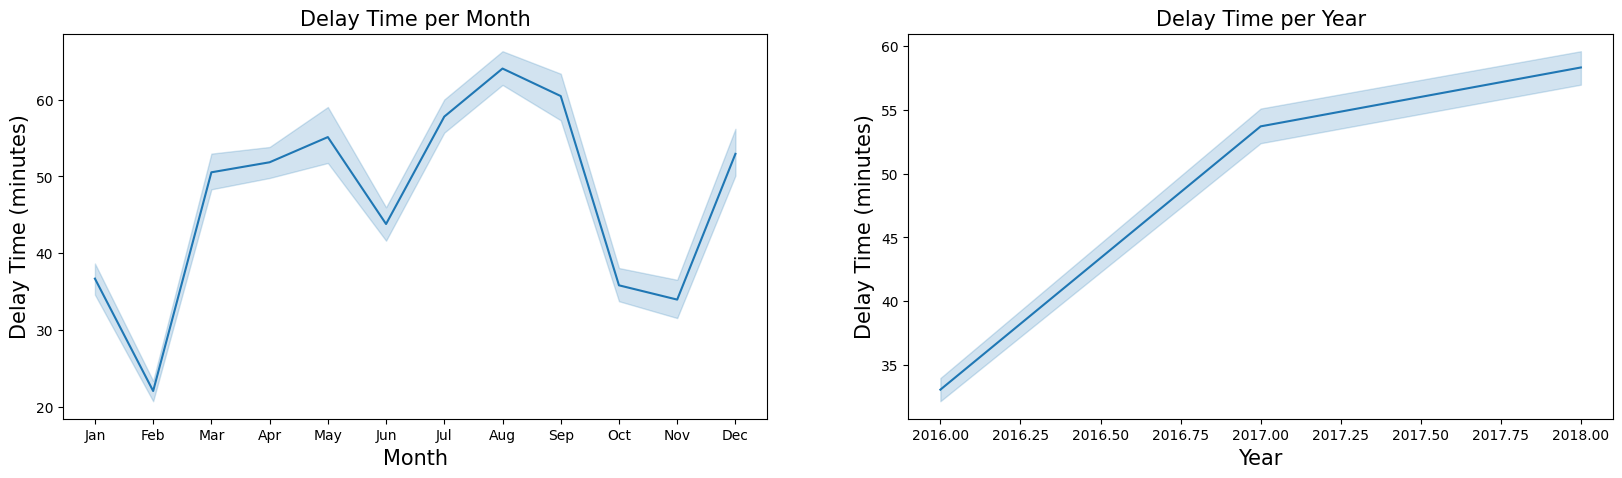

In [27]:
# Combined plots: Delay time per month and per year
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
colors = sns.color_palette("tab10", n_colors=6)
p1 = sns.lineplot(data=data, x='Month', y='target', palette=colors)
p1.set_xlabel("Month", fontsize=15)
p1.set_ylabel("Delay Time (minutes)", fontsize=15)
p1.set_title('Delay Time per Month', fontsize=15)

plt.subplot(1, 2, 2)
colors = sns.color_palette("tab10", n_colors=6)
p1 = sns.lineplot(data=data, x='Year', y='target', palette=colors)
p1.set_xlabel("Year", fontsize=15)
p1.set_ylabel("Delay Time (minutes)", fontsize=15)
p1.set_title('Delay Time per Year', fontsize=15)
plt.show()

# Insight: The combined plots provide a comprehensive view of how delay times vary both monthly and yearly, 
# facilitating the identification of broader temporal trends.

In [28]:
# Display the first few rows of the dataset
data.head()

# Grouping delays by month
monthly_delays = data.groupby("Month").count()["Delay"]
monthly_delays

# Insight: Grouping delays by month helps in understanding the overall distribution of delays across 
# different months, providing a macro-level view of delay trends.

Month
Apr     9621
Aug    13208
Dec     8822
Feb     5163
Jan     8640
Jul    12226
Jun     9764
Mar     8994
May     6786
Nov     7726
Oct     9466
Sep     7417
Name: Delay, dtype: int64